In [ ]:
import kernel
import numpy as np
import scipy
import matplotlib as plt
import sklearn
import johnson
import matplotlib.pyplot as plt

seed = 1048596
source_rng = np.random.default_rng(seed)
P = 200
alpha = 0.05
rbf = kernel.GaussianKernel()

Goodness-of-fit of the 

In [8]:
MMDs = []
n_MMD = 1_000
n = 1_000
m = 10_000

for k in range(n_MMD):
    rng = source_rng.spawn(1)[0]
    X = rng.multivariate_normal(np.zeros(2), np.eye(2), n)
    Y = rng.multivariate_normal(np.zeros(2), np.eye(2), n)
    mmd = rbf.MMD_2_U(X, Y)
    MMDs.append(mmd)

MMDs = np.array(MMDs)

X = source_rng.multivariate_normal(np.zeros(2), np.eye(2), m)
Y = source_rng.multivariate_normal(np.zeros(2), np.eye(2), m)
moments = rbf.moments_MMD_2_U(X, Y)
distrib = johnson.fit_johnsonsu_by_moments(*moments)

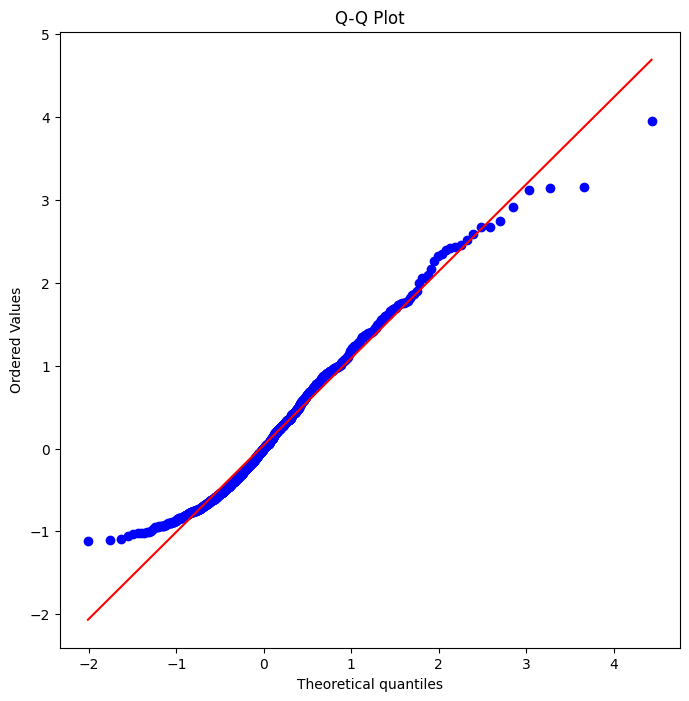

In [9]:
plt.figure(figsize=(8, 8))
scipy.stats.probplot(MMDs, dist=distrib, plot=plt)
plt.title('Q-Q Plot')
plt.show()

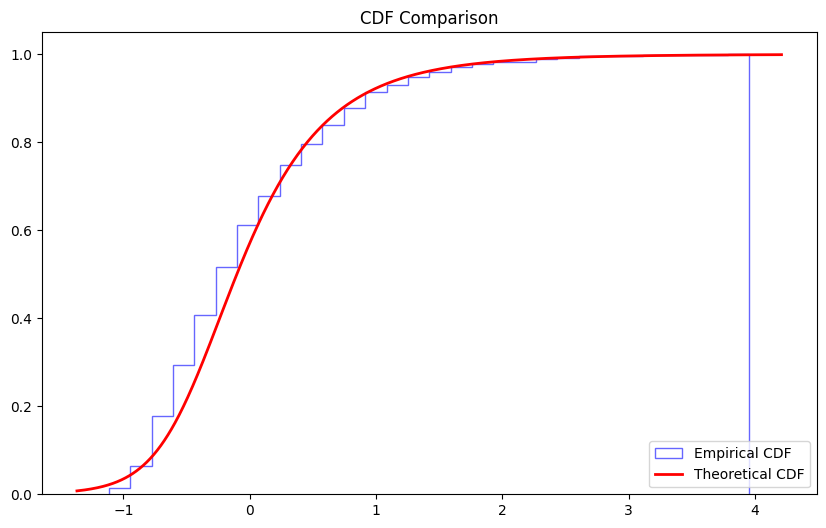

In [10]:
plt.figure(figsize=(10, 6))

# Empirical CDF
plt.hist(MMDs, bins=30, density=True, cumulative=True, 
         alpha=0.6, color='b', histtype='step', label='Empirical CDF')

# Theoretical CDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
plt.plot(x, distrib.cdf(x), 'r-', lw=2, label='Theoretical CDF')

plt.title('CDF Comparison')
plt.legend(loc='lower right')
plt.show()

In [ ]:
ks_statistic, p_value = scipy.stats.kstest(MMDs, distrib.cdf)
print(p_value)

0.03538802793181983


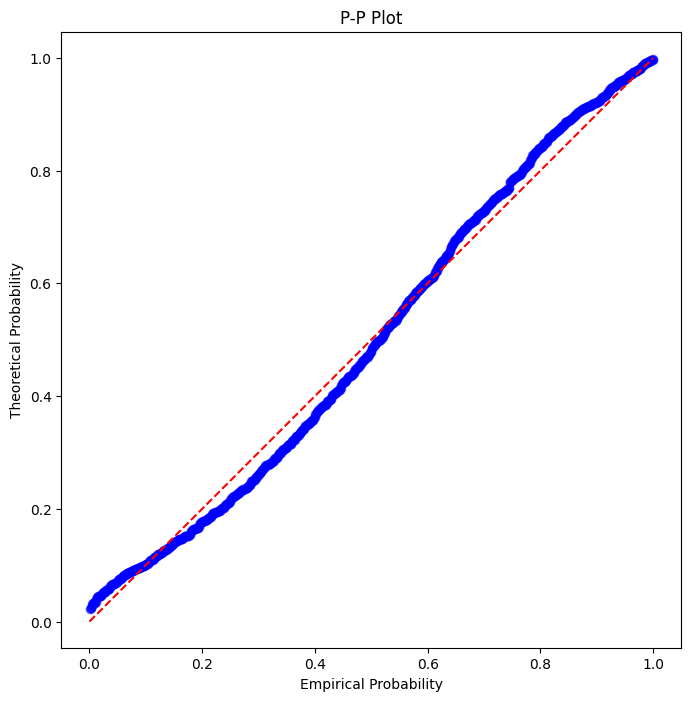

In [13]:
plt.figure(figsize=(8, 8))

# Calculate empirical and theoretical CDF values
sample_sorted = np.sort(MMDs)
ecdf = np.arange(1, len(MMDs)+1) / len(MMDs)
tcdf = distrib.cdf(sample_sorted)

# Plot
plt.plot(ecdf, tcdf, 'bo', alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')  # Reference line
plt.xlabel('Empirical Probability')
plt.ylabel('Theoretical Probability')
plt.title('P-P Plot')
plt.axis('equal')
plt.show()

In [ ]:
gauss_dim = 1
sigma = 10
d = 3
n_x, n_y = 2500, 2500
n = n_x + n_y
l_x, l_y = np.sqrt(n)//2, np.sqrt(n)//2

X = rng.multivariate_normal(np.zeros(d), np.eye(d), n_x)
Y = rng.multivariate_normal(np.zeros(d), sigma * np.eye(d), n_y)

# rbf.fit_bandwidth(X, Y, 1000)

rbf.test_mmd_nystrom_uniform(X, l_x, Y, l_y, alpha, P, seed)

TypeError: only integer scalar arrays can be converted to a scalar index